In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [165]:
df.shape

(41188, 21)

In [166]:
df.isnull().sum().sum()

0

In [167]:
#### remove duplicated rows or columns
df = df.drop_duplicates(keep='first')
df = df.loc[:,~df.columns.duplicated()]
df.shape

(41176, 21)

In [168]:
df = df.replace(to_replace ="unknown",value = np.nan)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [170]:
# unknow -> nan
# df = df.replace(to_replace ="unknown", value = np.nan)
# df = df.dropna()
# df.head()

In [171]:
df['conversion'] = df['y'].apply(lambda x: 0 if x=='no' else 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### Aggregate conversion rate

In [172]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 4639 out of 41176


In [173]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


### Conversion Rates by Number of Contacts

In [174]:
# df['campaign'].value_counts()

In [175]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
).head()

,conversion
campaign,
1,2299
2,1211
3,574
4,249
5,120


In [176]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
).head()

,conversion
campaign,
1,17634
2,10568
3,5340
4,2650
5,1599


In [177]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

pd.DataFrame(conversions_by_contacts).head()

,conversion
campaign,
1,13.037314
2,11.459122
3,10.749064
4,9.396226
5,7.504690


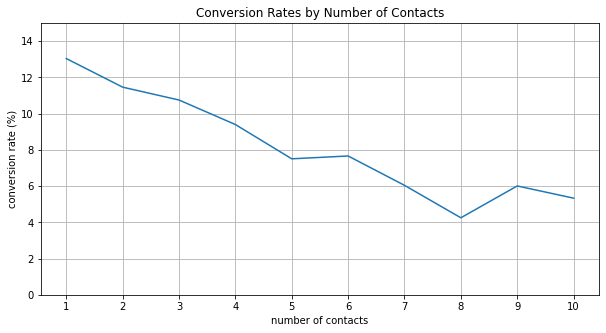

In [178]:
# Visualization
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 5),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Age

In [179]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].sum()
).head()

,conversion
age,
17,2
18,12
19,20
20,23
21,29


In [180]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].count()
).head()

,conversion
age,
17,5
18,28
19,42
20,65
21,102


In [181]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

pd.DataFrame(conversions_by_age).head()

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373


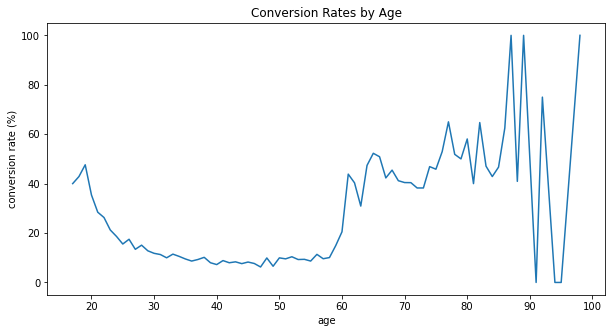

In [182]:
ax = conversions_by_age.plot(
    figsize=(10,5),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [183]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [184]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40, 50)",833
"[50, 60)",697
"[60, 70)",251


In [185]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
70+,468
"[18, 30)",5667
"[30, 40)",16933
"[40, 50)",10523
"[50, 60)",6861
"[60, 70)",724


In [186]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.222222
"[18, 30)",16.269631
"[30, 40)",10.128152
"[40, 50)",7.915994
"[50, 60)",10.158869
"[60, 70)",34.668508


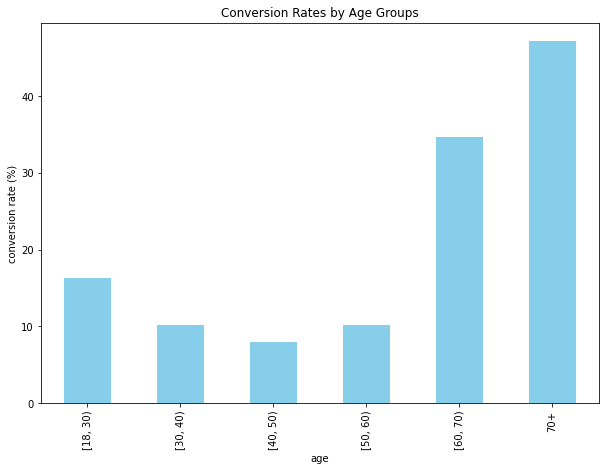

In [187]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversions vs Non-Conversions

#### Marital Status

In [188]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620


In [189]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620


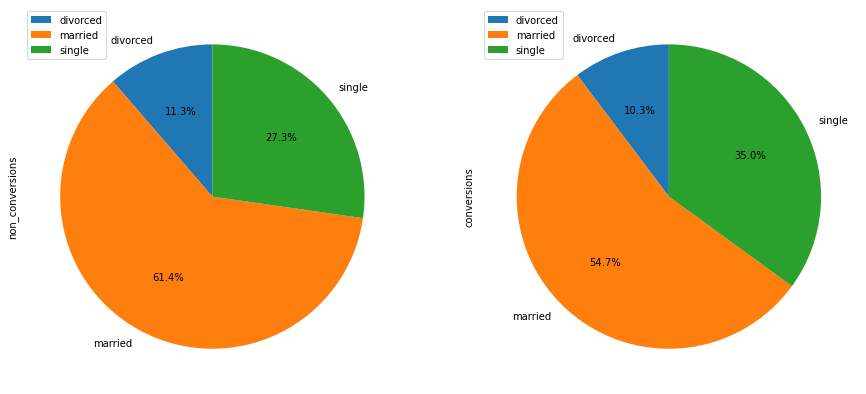

In [190]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### Education

In [191]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2103,188
basic.9y,5572,473
high.school,8481,1031
illiterate,14,4
professional.course,4645,595
university.degree,10495,1669


In [192]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2103,188
basic.9y,5572,473
high.school,8481,1031
illiterate,14,4
professional.course,4645,595
university.degree,10495,1669


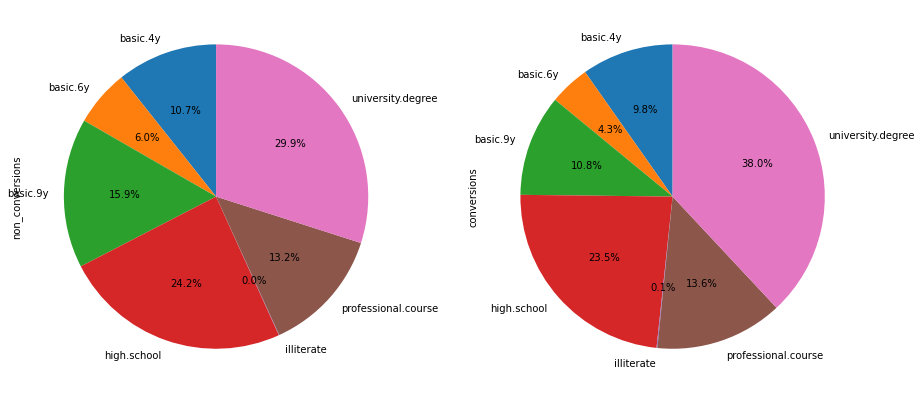

In [193]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

#### Last Contact Duration

In [194]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36537.0,220.868079,207.116178,0.0,95.0,164.0,279.0,4918.0
1,4639.0,553.256090,401.190736,37.0,253.5,449.0,741.5,4199.0


In [195]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60*60)

duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36532,NaN,0.070556
36533,NaN,0.031111
36534,NaN,0.106389
36535,NaN,0.052500


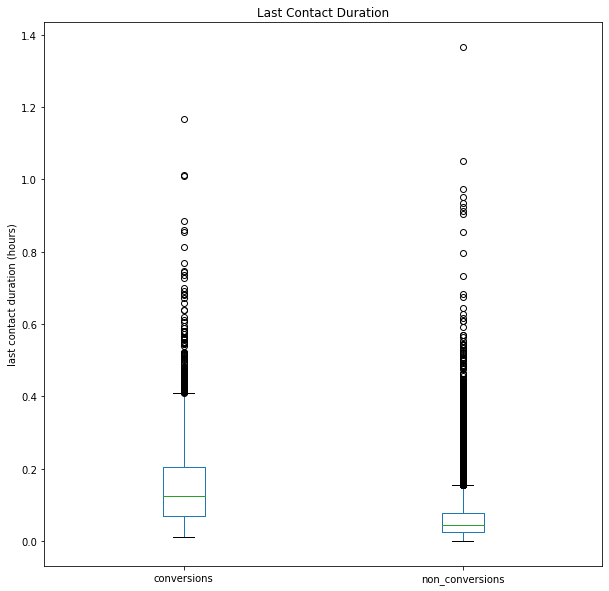

In [196]:
ax = duration_df.plot(
    kind='box',
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

### Conversions by Age Groups & Marital Status

In [197]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [198]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

age_marital_df

marital,divorced,married,single
age_group,,,
70+,0.136752,0.322650,0.012821
"[18, 30)",0.002118,0.027881,0.132522
"[30, 40)",0.007559,0.052973,0.040394
"[40, 50)",0.011974,0.054547,0.012354
"[50, 60)",0.017344,0.077685,0.006413
"[60, 70)",0.037293,0.301105,0.006906


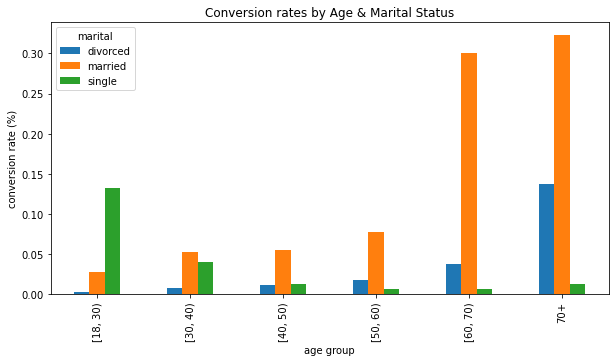

In [199]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    figsize=(10,5)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

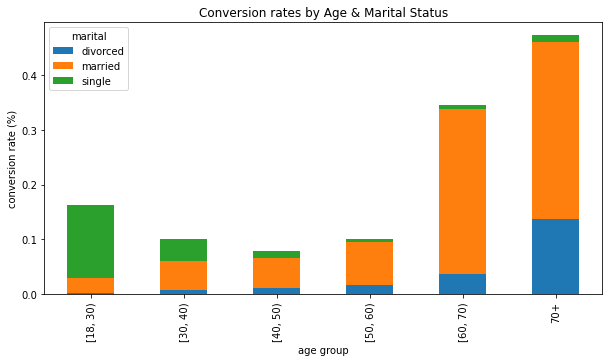

In [200]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    figsize=(10,5)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [201]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'conversion',
       'age_group'],
      dtype='object')

In [202]:
df1 = df.drop(columns=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no,0,"[50, 60)"
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no,0,"[50, 60)"


In [203]:
df1.shape

(41176, 18)

### Conversion Rate

In [204]:
conversion_rate_df = pd.DataFrame(
    df1.groupby('conversion').count()['y'] / df1.shape[0] * 100.0
)
conversion_rate_df.T

conversion,0,1
y,88.733728,11.266272


In [205]:
# Conversion Rates by Marital Status
conversion_rate_by_marital = df1.groupby(
    by='marital'
)['conversion'].sum() / df1.groupby(
    by='marital'
)['conversion'].count() * 100.0
conversion_rate_by_marital

marital
divorced    10.323140
married     10.156093
single      14.008993
Name: conversion, dtype: float64

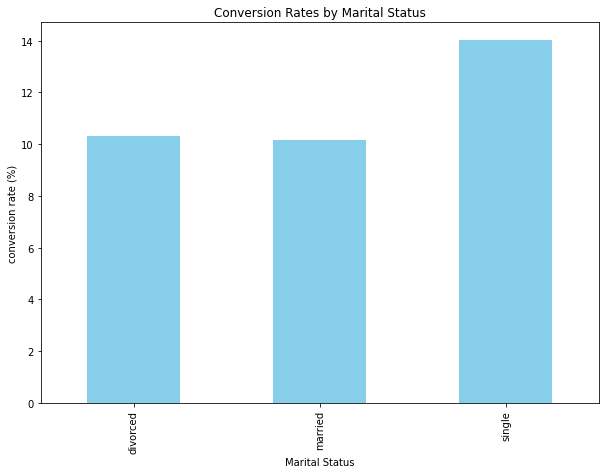

In [206]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [207]:
# Conversion Rates by Job
conversion_rate_by_job = df1.groupby(
    by='job'
)['conversion'].sum() / df1.groupby(
    by='job'
)['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
Name: conversion, dtype: float64

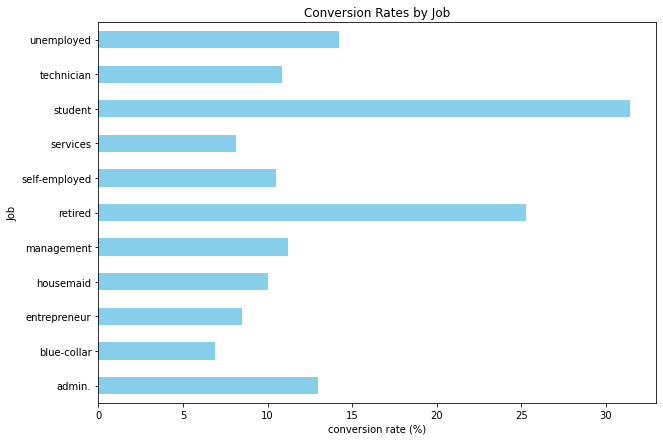

In [208]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

In [209]:
# Default Rates by Conversions
default_by_conversion_df = pd.pivot_table(
    df1, 
    values='y', 
    index='default', 
    columns='conversion', 
    aggfunc=len
)
default_by_conversion_df

conversion,0,1
default,,
no,28381.0,4196.0
yes,3.0,NaN


In [210]:
default_by_conversion_df.columns = ['non_conversions', 'conversions']
default_by_conversion_df

,non_conversions,conversions
default,,
no,28381.0,4196.0
yes,3.0,NaN


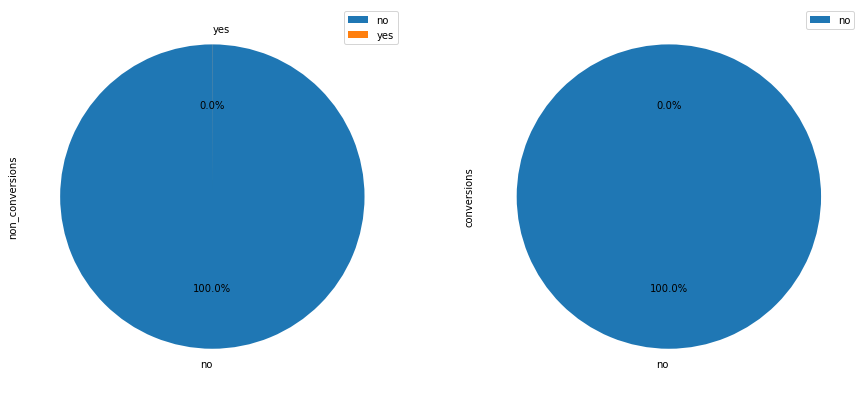

In [211]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [212]:
# Conversions by Number of Contacts
conversions_by_num_contacts = df1.groupby(
    by='campaign'
)['conversion'].sum() / df1.groupby(
    by='campaign'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,13.037314
2,11.459122
3,10.749064
4,9.396226
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


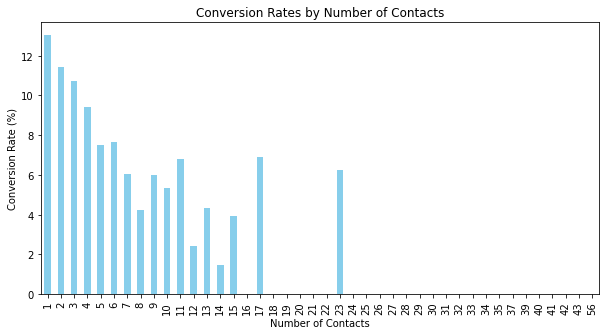

In [213]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 5),
    title='Conversion Rates by Number of Contacts',
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

### Encoding Categorical Variables

In [214]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'conversion', 'age_group'],
      dtype='object')

In [215]:
df1.describe()

,age,duration,campaign,pdays,previous,conversion
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.000000


In [216]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome'
]

In [217]:
df1[categorical_vars].nunique()

job            11
marital         3
education       7
default         2
housing         2
loan            2
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

#### encoding 'month'

In [218]:
df1['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [219]:
months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df1['month'] = df1['month'].apply(
    lambda x: months.index(x)+3
)
df1['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9], dtype=int64)

In [220]:
df1.groupby('month').count()['conversion']

month
3       546
4      2631
5     13767
6      5318
7      7169
8      6176
9       570
10      717
11     4100
12      182
Name: conversion, dtype: int64

#### encoding 'job'

In [221]:
df1['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [222]:
jobs_encoded_df = pd.get_dummies(df1['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [223]:
df1 = pd.concat([df1, jobs_encoded_df], axis=1)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,NaN,no,no,telephone,5,mon,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,0,0,0,0,0,0,1,0,0,0


#### encoding 'marital'

In [224]:
marital_encoded_df = pd.get_dummies(df1['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [225]:
df1 = pd.concat([df1, marital_encoded_df], axis=1)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
1,57,services,married,high.school,NaN,no,no,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0


#### encoding 'housing'

In [226]:
df1['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [228]:
housing_status = ['no', 'yes', np.nan]

df1['housing'] = df1['housing'].apply(
    lambda x: housing_status.index(x)+1
)
df1['housing'].unique()

array([1, 2, 3], dtype=int64)

In [230]:
# df1['housing'] = df1['housing'].apply(lambda x: 1 if x=='yes' else 0)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,housemaid,married,basic.4y,no,1,no,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
1,57,services,married,high.school,NaN,1,no,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,2,no,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,1,no,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,high.school,no,1,yes,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0


#### encoding 'loan'

In [232]:
df1['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [233]:
# df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
loan_status = ['no', 'yes', np.nan]

df1['loan'] = df1['loan'].apply(
    lambda x: loan_status.index(x)+1
)
df1['loan'].unique()

array([1, 2, 3], dtype=int64)

In [234]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,housemaid,married,basic.4y,no,1,1,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
1,57,services,married,high.school,NaN,1,1,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,2,1,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,no,1,1,telephone,5,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,high.school,no,1,2,telephone,5,mon,...,0,0,0,1,0,0,0,0,1,0


### Fitting Model

#### Decision Tree

In [235]:
features = [
    'age',
    'campaign',
    'previous',
    'housing',
    'loan'
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)
response_var = 'conversion'

features

['age',
 'campaign',
 'previous',
 'housing',
 'loan',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [236]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)
dt_model.fit(df1[features], df1[response_var])

DecisionTreeClassifier(max_depth=4)

In [237]:
dt_model.classes_

array([0, 1], dtype=int64)

In [238]:
# conda install python-graphviz
import graphviz

In [239]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 

In [246]:
graph = graphviz.Source(dot_data)

In [248]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

#graph

In [ ]:
# https://github.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/blob/master/Bank_Marketing_Project.ipynb

In [ ]:
# https://github.com/RumanaSk/Bank-Marketting-Campaign-Analysis

In [ ]:
# https://jovian.ai/claudiaqw/02-bank-logistic-regression

In [ ]:
# https://medium0.com/mlearning-ai/data-driven-approach-to-predict-success-of-bank-marketing-31791cad8f81

In [ ]:
# https://colab.research.google.com/github/rafiag/DTI2020/blob/main/004_Classification_Bank_Marketing_Dataset_(Assignment).ipynb

In [ ]:
# https://www.kaggle.com/henriqueyamahata/bank-marketing/code